In [1]:
#to process text data import this lib
import xmltodict

In [2]:
#get text data and verify that it is working properly
xml = 'RawDataFolder/sms-20180303224019.xml'
#with open(xml, 'rb') as xmldoc:
xmldoc = open(xml, 'rb')
raw_texts = xmltodict.parse(xmldoc)
#print(raw_texts['smses'].keys())
#for text in raw_texts['smses']['sms'][:3]:
#    print(text)

In [3]:
#set up libs and options
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

test Myers Briggs data

In [4]:
#import redit posting data
import pandas as pd
reddit_text = pd.read_csv('RawDataFolder/Reddit_mbti_data_2.csv',encoding='utf-8').set_index('Name')

In [5]:
reddit_text_filler = pd.read_csv('RawDataFolder/Reddit_mbti_data_filler.csv',encoding='utf-8').set_index('Name')

In [6]:
#import mbti data from kaggle
Meyers_text = pd.read_csv('RawDataFolder/mbti_1.csv')

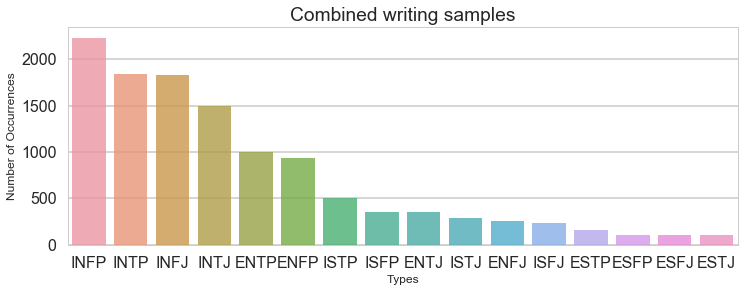

In [7]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [8]:
combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INFP    2237
INTP    1844
INFJ    1836
INTJ    1500
ENTP    1005
ENFP     933
ISTP     498
ISFP     350
ENTJ     350
ISTJ     282
ENFJ     256
ISFJ     238
ESTP     160
ESFP     102
ESFJ     102
ESTJ     101
dtype: int64


In [9]:
cnt_srs = reddit_text[reddit_text.text_count<40].mbti.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INTP    83
INTJ    73
INFJ    65
INFP    64
ENTP    44
ENFP    40
ISTP    31
ENTJ    23
ISFJ    21
ISFP    15
ENFJ    14
ESTP    12
ESFP    10
ISTJ     9
ESFJ     8
ESTJ     8
Name: mbti, dtype: int64


In [10]:
print(reddit_text.drop('text', axis=1)[reddit_text.text_count<50])

                      mbti  text_count
Name                                  
sweetsleeper          INTP        37.0
CleanDevelopment      ISTP        15.0
FunEquivalent         ISFP        34.0
Ayumu916              INFP        29.0
anacmelo              INTJ        25.0
suzythecreator        ISTP        28.0
magdaUl               ENTP         5.0
TheBureaucratJosephK  INTJ        40.0
analysis_god          INTP        34.0
PM-me-ur-MBTI-quirk   INFJ         7.0
Pos_Ki                INTJ        23.0
SousanTheMage         INTP        36.0
EffectiveEdge         ENFP         9.0
dashing-rainbows      ISTJ        29.0
Blissnoir             ISFJ        21.0
lle-ell               ENTP        47.0
IdealisticDegenerate  ENFP        17.0
TRlLLS                ENTJ        18.0
Plaid_Warlock         INTJ         8.0
arcticsehnsucht       INFP        39.0
taco-kat              INFP        49.0
jerompe               ENFP         9.0
pariah_piranha        INFP        28.0
Struggling_Millenial  EST

In [11]:
Meyers_text = Meyers_text.rename(index=str, columns={"type": "mbti", "posts": "text"})
combined_data = reddit_text.append([Meyers_text, reddit_text_filler], ignore_index=True).fillna(50)

In [12]:
from sklearn.utils import shuffle
even = False
if even==True:
    #randomly select 100 examples of each
    combined_data_evened = shuffle(combined_data.groupby('mbti').apply(lambda x: x.sample(100)).reset_index(drop=True))
else:
    combined_data_evened = combined_data
    

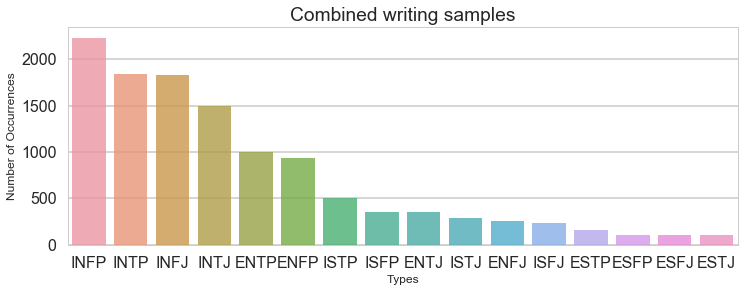

In [13]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

cnt_srs = combined_data_evened.mbti.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [14]:
#split the data into test and training groups via mask
from sklearn.model_selection import train_test_split
_, itest_mbti = train_test_split(range(len(combined_data_evened['text'])), train_size=.66,stratify=combined_data_evened.mbti)
mask_mbti = np.zeros(len(combined_data_evened['text']), dtype=np.bool)
mask_mbti[itest_mbti] = True
mask_mbti = ~mask_mbti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
#create arrays for results
y_IE = (combined_data_evened.mbti.str.contains('I') == 1).values.astype(np.int)
y_NS = (combined_data_evened.mbti.str.contains('N') == 1).values.astype(np.int)
y_TF = (combined_data_evened.mbti.str.contains('F') == 1).values.astype(np.int)
y_JP = (combined_data_evened.mbti.str.contains('J') == 1).values.astype(np.int)

In [16]:
#create one true results dataframe
y = pd.concat([pd.DataFrame(y_IE),pd.DataFrame(y_NS),pd.DataFrame(y_TF),pd.DataFrame(y_JP)], \
              keys = ['y_IE','y_NS','y_TF','y_JP'],axis=1)

print(combined_data_evened.mbti[:5])
print(y[:5])

0    ENTP
1    INTJ
2    ISTP
3    ENTP
4    ENTP
Name: mbti, dtype: object
  y_IE y_NS y_TF y_JP
     0    0    0    0
0    0    1    0    0
1    1    1    0    1
2    1    0    0    0
3    0    1    0    0
4    0    1    0    0


In [17]:
#preprocess all the mbti data
import re
from bs4 import BeautifulSoup

elim_mbti_type=True

#add a removal of all mtbi classes                                                 <-change
def cleanText(text):
    #text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = re.sub(r"'", r'', text)
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = re.sub(r'nbsp', r'', text)
    text = re.sub(r'\d[w]\d', r'', text)#\\dw\\d #7w8
    if (elim_mbti_type==True):
        text = re.sub(r'intp', r'<MBTI>', text)
        text = re.sub(r'intj', r'<MBTI>', text)
        text = re.sub(r'infj', r'<MBTI>', text)
        text = re.sub(r'infp', r'<MBTI>', text)
        text = re.sub(r'entp', r'<MBTI>', text)
        text = re.sub(r'enfp', r'<MBTI>', text)
        text = re.sub(r'istp', r'<MBTI>', text)
        text = re.sub(r'entj', r'<MBTI>', text)
        text = re.sub(r'isfj', r'<MBTI>', text)
        text = re.sub(r'enfj', r'<MBTI>', text)
        text = re.sub(r'isfp', r'<MBTI>', text)
        text = re.sub(r'esfp', r'<MBTI>', text)
        text = re.sub(r'estp', r'<MBTI>', text)
        text = re.sub(r'estj', r'<MBTI>', text)
        text = re.sub(r'esfj', r'<MBTI>', text)
        text = re.sub(r'istj', r'<MBTI>', text)
    return text
combined_data_evened['clean_text'] = combined_data_evened['text'].apply(cleanText)
#print(combined_data_evened['clean_text'][0])
print('done')

done


____________________________________________________________________________

In [18]:
#initialized text processing libs and vars
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer_mtbi = TfidfVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)
#vectorizer_mtbi = CountVectorizer(min_df=10,stop_words=‘english’)

In [19]:
#texts from http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ only using ham messages for normalization
NormalTexts = open('rawDataFolder\otherTextsForNormalizing\SMSSpamCollection.txt', 'rb')
notSpamNormTexts = [str(text).split('\\t')[1].strip("\\n'") for text in NormalTexts.readlines() if (str(text).split('\\t')[0] != 'b"spam')]
notSpamNormTextsdf = pd.Series(notSpamNormTexts)
raw_text_series_Norm = notSpamNormTextsdf.apply(cleanText)
#print(type(raw_text_series_Norm))

#find all my text
raw_text_me = []
for message in raw_texts['smses']['sms']:
    #only include texts that you have sent
    if ((int(message['@type'])==2) and (message['@body'] != '')):
        raw_text_me.append(message['@body']) 
raw_text_series_me = pd.Series(raw_text_me).drop_duplicates(keep='first').reset_index(drop=True)
#print(type(raw_text_series_me))


#create a list of all the people who have texted me
People = []
for text in raw_texts['smses']['sms']:
    if ((text['@contact_name'] not in People) and int(text['@type'])!=2):
        People.append(text['@contact_name'])
        #print(text)
#print(People)
#collect all the texts from each of my contacts
from collections import defaultdict
raw_text_friends = defaultdict(list)
for person in People:
    for message in raw_texts['smses']['sms']:
        #only include texts that you have sent
        if ((int(message['@type'])!=2) and (message['@contact_name']==person) and (message['@body'] != '')):
            raw_text_friends[person].append(message['@body']) 
#print(raw_text_friends)
raw_text_series_friend = pd.Series(raw_text_friends)
postings_raw = list(raw_text_friends.values())
import itertools
postings = np.array(list(itertools.chain.from_iterable(postings_raw)))
#print(type(pd.Series(postings)))


#print(type(combined_data_evened['clean_text']))


In [20]:
all_texts_and_posts = combined_data_evened['clean_text'].append(raw_text_series_Norm).append(raw_text_series_me).append(pd.Series(postings))

In [21]:
#preform the data split

vectorizer_mtbi.fit(all_texts_and_posts)
#vectorizer_mtbi.fit(combined_data_evened['clean_text'])
X = vectorizer_mtbi.transform(combined_data_evened['clean_text'])

xtrain=X[mask_mbti]
ytrain=y[mask_mbti]
xtest=X[~mask_mbti]
ytest=y[~mask_mbti]

from sklearn.metrics import classification_report

In [22]:
#vectorizer_mtbi.vocabulary_

______________________________________________________________________________________

In [23]:
wei_cat1 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENFJ')
wei_cat2 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENFP')
wei_cat3 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENTJ')
wei_cat4 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ENTP')
wei_cat5 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESFJ')
wei_cat6 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESFP')
wei_cat7 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESTJ')
wei_cat8 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ESTP')
wei_cat9 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INFJ')
wei_cat10 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INFP')
wei_cat11 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INTJ')
wei_cat12 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='INTP')
wei_cat13 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISFJ')
wei_cat14 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISFP')
wei_cat15 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISTJ')
wei_cat16 = np.count_nonzero(combined_data_evened.mbti[mask_mbti]!='ISTP')
sample_size = len(ytrain)
inverseWeight_net = np.ravel( \
    (wei_cat1/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENFJ')+ \
    (wei_cat2/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENFP')+ \
    (wei_cat3/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENTJ')+ \
    (wei_cat4/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ENTP')+ \
    (wei_cat5/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESFJ')+ \
    (wei_cat6/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESFP')+ \
    (wei_cat7/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESTJ')+ \
    (wei_cat8/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ESTP')+ \
    (wei_cat9/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INFJ')+ \
    (wei_cat10/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INFP')+ \
    (wei_cat11/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INTJ')+ \
    (wei_cat12/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='INTP')+ \
    (wei_cat13/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISFJ')+ \
    (wei_cat14/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISFP')+ \
    (wei_cat15/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISTJ')+ \
    (wei_cat16/sample_size)*np.array(combined_data_evened.mbti[mask_mbti]=='ISTP'))
#print(inverseWeight_net[:5])

In [24]:
#check accuracy of each model on the saved training data
clf_cumulative = MultinomialNB(alpha=1).fit(xtrain, combined_data_evened.mbti[mask_mbti],sample_weight=inverseWeight_net)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_cumulative.score(xtrain, combined_data_evened.mbti[mask_mbti])
test_accuracy = clf_cumulative.score(xtest, combined_data_evened.mbti[~mask_mbti])
from sklearn.metrics import precision_recall_fscore_support

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(combined_data_evened.mbti[mask_mbti],clf_cumulative.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(combined_data_evened.mbti[~mask_mbti],clf_cumulative.predict(xtest)))

Accuracy on training data: 0.323613
Training report: 
              precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00       169
       ENFP       0.00      0.00      0.00       616
       ENTJ       0.00      0.00      0.00       231
       ENTP       0.57      0.01      0.01       663
       ESFJ       0.00      0.00      0.00        67
       ESFP       0.00      0.00      0.00        67
       ESTJ       0.00      0.00      0.00        67
       ESTP       0.00      0.00      0.00       106
       INFJ       0.38      0.36      0.37      1212
       INFP       0.27      0.88      0.42      1476
       INTJ       0.73      0.15      0.25       990
       INTP       0.38      0.51      0.43      1217
       ISFJ       0.00      0.00      0.00       157
       ISFP       0.00      0.00      0.00       231
       ISTJ       0.00      0.00      0.00       186
       ISTP       0.00      0.00      0.00       329

avg / total       0.31      0.32      0.24

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy is not high enough for all the classes to be analyzed at once

In [61]:
#check accuracy of each model on the saved training data
intra_num_IE = np.sum(ytrain['y_IE'])
extra_num_IE = np.sum(1-ytrain['y_IE'])
sample_size = len(ytrain)
print(extra_num_IE/sample_size)
print(intra_num_IE/sample_size)
inverseWeight_IE = np.ravel((extra_num_IE/sample_size)*ytrain['y_IE']+ \
    (intra_num_IE/sample_size)*(1-ytrain['y_IE']))

clf_IE = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
pred1 = clf_IE.predict(xtrain)

from sklearn.svm import LinearSVC
#clf_IE2 = LinearSVC(random_state=0).fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
#pred2 = clf_IE2.predict(xtrain)

from sklearn.linear_model import LogisticRegression
#clf_IE3 = LogisticRegression().fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
#pred3 = clf_IE3.predict(xtrain)

from sklearn.linear_model import SGDClassifier
#clf_IE4 = SGDClassifier().fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
#pred4 = clf_IE4.predict(xtrain)

import xgboost as xgb
#clf_IE5 = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(xtrain, ytrain['y_IE'],sample_weight=inverseWeight_IE)
#pred5 = clf_IE5.predict(xtrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_IE.score(xtrain, ytrain['y_IE'])
test_accuracy = clf_IE.score(xtest, ytest['y_IE'])
from sklearn.metrics import precision_recall_fscore_support

print('Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE.predict(xtest)))

0    0.255139
dtype: float64
0    0.744861
dtype: float64
hi
Intorvert/Extrovert
Accuracy on training data: 0.738052
Training report: 
              precision    recall  f1-score   support

          0       0.49      0.82      0.61      1986
          1       0.92      0.71      0.80      5798

avg / total       0.81      0.74      0.75      7784

Accuracy on test data:     0.675062
Testing report: 
              precision    recall  f1-score   support

          0       0.42      0.67      0.51      1023
          1       0.86      0.68      0.76      2987

avg / total       0.74      0.68      0.69      4010



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pred1_t = clf_IE.predict(xtest)
pred2_t = clf_IE2.predict(xtest)
pred3_t = clf_IE3.predict(xtest)
pred4_t = clf_IE4.predict(xtest)
pred5_t = clf_IE5.predict(xtest)

from sklearn.ensemble import RandomForestClassifier
clf_ensm = RandomForestClassifier(n_estimators=10)
comb_preds = pd.DataFrame({'pred1':pred1,'pred2':pred2,'pred3':pred3,'pred4':pred4,'pred5':pred5})
comb_preds_t = pd.DataFrame({'pred1':pred1_t,'pred2':pred2_t,'pred3':pred3_t,'pred4':pred4_t,'pred5':pred5_t})

clf_ensm.fit(comb_preds, ytrain['y_IE'],sample_weight=inverseWeight_IE)
test_accuracy = clf_ensm.score(comb_preds_t, ytest['y_IE'])
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_ensm.predict(comb_preds_t)))

________________________________________________________________________________________________________
CNN Area

In [26]:
#https://www.kaggle.com/jacklinggu/keras-mlp-cnn-test-for-text-classification
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics

tags = y['y_IE']
texts = combined_data_evened['clean_text']

num_max = 5000
# preprocess
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_texts = tok.texts_to_matrix(texts,mode='count')
print(tags[:5])
print(mat_texts[:5])
print(tags.shape,mat_texts.shape)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 1 0 0]
[[   0.   72.   29. ...,    0.    0.    0.]
 [   0.   19.    7. ...,    0.    0.    0.]
 [   0.  105.  103. ...,    0.    0.    0.]
 [   0.   17.   52. ...,    0.    0.    0.]
 [   0.   33.   54. ...,    0.    0.    0.]]
(11794,) (11794, 5000)


In [27]:
def get_cnn_model():   
    model = Sequential()
    # we start off with an efficient embedding layer which maps
    # our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(1000,
                        50, 
                        input_length = mat_texts.shape[1]))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model

def check_model(model,x,y):
    model.fit(x,y,batch_size=32,epochs=10,verbose=1,sample_weight=inverseWeight_IE)

m = get_cnn_model()
check_model(m,mat_texts[mask_mbti],tags[mask_mbti])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 50)          50000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000, 50)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4998, 64)          9664      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
act

In [28]:
print("Testing report: \n", classification_report(tags[~mask_mbti],m.predict_classes(mat_texts[~mask_mbti])))

4010/4010 [==============================] - 79s 20ms/step
Testing report: 
              precision    recall  f1-score   support

          0       0.27      0.28      0.28      1023
          1       0.75      0.74      0.75      2987

avg / total       0.63      0.62      0.63      4010



____________________________________________________________________________________
New test RNN Area

In [29]:
tags = y['y_IE']
texts = combined_data_evened['clean_text']

num_max = 1000
# preprocess
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_texts = tok.texts_to_matrix(texts,mode='count')
print(tags[:5])
print(mat_texts[:5])
print(tags.shape,mat_texts.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 1 0 0]
[[   0.   72.   29. ...,    0.    0.    0.]
 [   0.   19.    7. ...,    0.    0.    0.]
 [   0.  105.  103. ...,    1.    0.    0.]
 [   0.   17.   52. ...,    0.    0.    0.]
 [   0.   33.   54. ...,    0.    0.    0.]]
(11794,) (11794, 1000)


In [30]:
#https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM


top_words = num_max
print(top_words)
embedding_vecor_length = 32

# Model saving callback
ckpt_callback = ModelCheckpoint('keras_model', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')

model = Sequential()
model.add(Embedding(top_words,
                    embedding_vecor_length,
                    input_length = mat_texts.shape[1]))
#model.add(Embedding(num_words, embed_dim, input_length = X.shape[1]))
model.add(LSTM(top_words, recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['categorical_crossentropy'])
print(model.summary())

1000
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              4132000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 4,165,001
Trainable params: 4,165,001
Non-trainable params: 0
_________________________________________________________________
None


from keras.utils.np_utils import to_categorical
model.fit(mat_texts[mask_mbti], tags[mask_mbti], epochs=3, batch_size=32)#64)
# Final evaluation of the model
scores = model.evaluate(mat_texts[~mask_mbti], tags[~mask_mbti], verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

RNN 75% effective and 1.5 days to train

_____________________________________________________________________________________

In [31]:
intra_num_NS = np.sum(ytrain['y_NS'])
extra_num_NS = np.sum(1-ytrain['y_NS'])
print(extra_num_NS/sample_size)
print(intra_num_NS/sample_size)
inverseWeight_NS = np.ravel((extra_num_NS/sample_size)*ytrain['y_NS']+ \
    (intra_num_NS/sample_size)*(1-ytrain['y_NS']))
clf_NS = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_NS'],sample_weight=inverseWeight_NS)
#clf_NS = LinearSVC(random_state=0).fit(xtrain, ytrain['y_NS'],sample_weight=inverseWeight_IE)


#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_NS.score(xtrain, ytrain['y_NS'])
test_accuracy = clf_NS.score(xtest, ytest['y_NS'])

print('Intuitive/Sensing')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_NS'],clf_NS.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_NS'],clf_NS.predict(xtest)))

0    0.155447
dtype: float64
0    0.844553
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intuitive/Sensing
Accuracy on training data: 0.758993
Training report: 
              precision    recall  f1-score   support

          0       0.37      0.75      0.49      1210
          1       0.94      0.76      0.84      6574

avg / total       0.85      0.76      0.79      7784

Accuracy on test data:     0.695511
Testing report: 
              precision    recall  f1-score   support

          0       0.26      0.52      0.35       623
          1       0.89      0.73      0.80      3387

avg / total       0.79      0.70      0.73      4010



In [32]:
#intra_num_TF = np.sum(ytrain['y_TF'])
#extra_num_TF = np.sum(1-ytrain['y_TF'])
#print(extra_num_TF/sample_size)
#print(intra_num_TF/sample_size)
#inverseWeight_TF = np.ravel((extra_num_TF/sample_size)*ytrain['y_NS']+ \
#    (intra_num_TF/sample_size)*(1-ytrain['y_TF']))
clf_TF = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_TF'],sample_weight=None)
#clf_TF = LinearSVC(random_state=0).fit(xtrain, ytrain['y_TF'],sample_weight=None)


#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_TF.score(xtrain, ytrain['y_TF'])
test_accuracy = clf_TF.score(xtest, ytest['y_TF'])

print('Thinking/Feeling')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_TF'],clf_TF.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_TF'],clf_TF.predict(xtest)))

Thinking/Feeling
Accuracy on training data: 0.740365
Training report: 
              precision    recall  f1-score   support

          0       0.78      0.65      0.71      3789
          1       0.71      0.83      0.77      3995

avg / total       0.75      0.74      0.74      7784

Accuracy on test data:     0.718703
Testing report: 
              precision    recall  f1-score   support

          0       0.77      0.61      0.68      1951
          1       0.69      0.83      0.75      2059

avg / total       0.73      0.72      0.71      4010



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
intra_num_JP = np.sum(ytrain['y_JP'])
extra_num_JP = np.sum(1-ytrain['y_JP'])
print(extra_num_JP/sample_size)
print(intra_num_JP/sample_size)
inverseWeight_JP = np.ravel((extra_num_JP/sample_size)*ytrain['y_JP']+ \
    (intra_num_JP/sample_size)*(1-ytrain['y_JP']))
clf_JP = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_JP'],sample_weight=inverseWeight_JP)
#clf_JP = LinearSVC(random_state=0).fit(xtrain, ytrain['y_JP'],sample_weight=inverseWeight_JP)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_JP.score(xtrain, ytrain['y_JP'])
test_accuracy = clf_JP.score(xtest, ytest['y_JP'])

print('Judging/Perceiving')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_JP'],clf_JP.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_JP'],clf_JP.predict(xtest)))

0    0.604445
dtype: float64
0    0.395555
dtype: float64
Judging/Perceiving
Accuracy on training data: 0.707862
Training report: 
              precision    recall  f1-score   support

          0       0.79      0.71      0.74      4705
          1       0.61      0.71      0.66      3079

avg / total       0.72      0.71      0.71      7784

Accuracy on test data:     0.628678
Testing report: 
              precision    recall  f1-score   support

          0       0.71      0.64      0.68      2424
          1       0.53      0.61      0.56      1586

avg / total       0.64      0.63      0.63      4010



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_________________________________________________________________________________________________

In [35]:
#texts from http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ only using ham messages for normalization
NormalTexts = open('rawDataFolder\otherTextsForNormalizing\SMSSpamCollection.txt', 'rb')
notSpamNormTexts = [str(text).split('\\t')[1].strip("\\n'") for text in NormalTexts.readlines() if (str(text).split('\\t')[0] != 'b"spam')]
notSpamNormTextsdf = pd.Series(notSpamNormTexts)
raw_text_series_Norm = notSpamNormTextsdf.apply(cleanText)

In [36]:
#test predictions for my texts
vected_sms_meyers_Norm = vectorizer_mtbi.transform(raw_text_series_Norm)

In [37]:
Norm_pred_IE = clf_IE.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_IE = np.sum(Norm_pred_IE)/len(Norm_pred_IE)
print('0=E and 1=I: ',(Norm_IE))

0=E and 1=I:  0.510343471487


In [38]:
Norm_pred_NS = clf_NS.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_NS = np.sum(Norm_pred_NS)/len(Norm_pred_NS)
print('0=S and 1=N: ',(Norm_NS))

0=S and 1=N:  0.520615735051


In [39]:
Norm_pred_TF = clf_TF.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_TF = np.sum(Norm_pred_TF)/len(Norm_pred_TF)
print('0=T and 1=F: ',(Norm_TF))

0=T and 1=F:  0.48753424758


In [40]:
Norm_pred_JP = clf_JP.predict_proba(vected_sms_meyers_Norm)[:,0]
Norm_JP = np.sum(Norm_pred_JP)/len(Norm_pred_JP)
print('0=P and 1=J: ',(Norm_JP))

0=P and 1=J:  0.502957227119


______________________________________________________________________________

In [41]:
#find all my text
raw_text_me = []
for message in raw_texts['smses']['sms']:
    #only include texts that you have sent
    if ((int(message['@type'])==2) and (message['@body'] != '')):
        raw_text_me.append(message['@body']) 
print(raw_text_me[1:3])
raw_text_series_me = pd.Series(raw_text_me).drop_duplicates(keep='first').reset_index(drop=True)

['Guess who just got an iPhone!', 'Haha yay! How...?']


add a pre-processing step!

In [42]:
raw_text_series_me = raw_text_series_me.apply(cleanText)
print(raw_text_series_me.head())

0    guess who just got an iphone and is therefore ...
1                        guess who just got an iphone!
2                                    haha yay! how...?
3             i mean how to do i put in fun emoticons?
4    hahahaha who doesnt like my melons! is that a ...
dtype: object


In [43]:
#test predictions for my texts
vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_me)

In [44]:
IE_prediction = clf_IE.predict_proba(vected_sms_meyers)[:,0]
print('-.5=E and .5=I: ',(np.sum(IE_prediction)/len(IE_prediction)-Norm_IE))

-.5=E and .5=I:  0.0019007715872


In [56]:
#show words that are the most polarized in introverted vs extroverted
postings = raw_text_series_me

#x = np.eye(postings)
#probs = clf_IE.predict_log_proba(x)
sent_probs = clf_IE.predict_proba(vected_sms_meyers)[:, 0]
indes_I = np.argsort(sent_probs)

good_words = postings[indes_I[:5]]
bad_words = postings[indes_I[-5:]]

good_prob = sent_probs[indes_I[:5]]
bad_prob = sent_probs[indes_I[-5:]]

print("Introverted Sentences\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:.2f}".format(1-p),"{:>20}".format(w))

print("")
print("_____________________________________________")
print("")
    
print("Extroverted Sentences\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:.2f}".format(1-p),"{:>20}".format(w))

Introverted Sentences	     P(Introverted | Extroverted)
0.52 guess who just got an iphone and is therefore never going to get any work done because of games!
0.51 i mean how to do i put in fun emoticons?
0.51                    s
0.51              k thank
0.51    haha yay! how...?

_____________________________________________

Extroverted Sentences	     P(Introverted | Extroverted)
0.50 whats the metro trip app that lets you see where the busses are at?
0.46 haha aw yeah! good luck! let me know it goes! how do you install it to the keyboard?
0.46 hahahaha who doesnt like my melons! is that a smiling pile of poo?
0.46 guess who just got an iphone!
0.45 haha yep im just downloading a lot and will cut down later


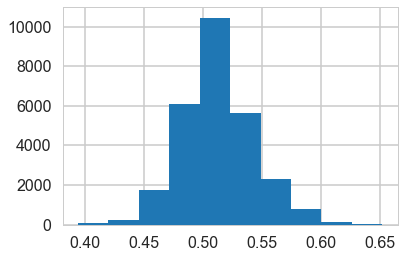

In [46]:
plt.hist(sent_probs)
plt.show()

In [47]:
NS_prediction = clf_NS.predict_proba(vected_sms_meyers)[:,0]
print('-.5=S and .5=N: ',(np.sum(NS_prediction)/len(NS_prediction)-Norm_NS))

-.5=S and .5=N:  -0.0012587686001


In [48]:
TF_prediction = clf_TF.predict_proba(vected_sms_meyers)[:,0]
print('-.5=T and .5=F: ',(np.sum(TF_prediction)/len(TF_prediction)-Norm_TF))

-.5=T and .5=F:  -0.0207435151549


In [49]:
JP_prediction = clf_JP.predict_proba(vected_sms_meyers)[:,0]
print('-.5=P and .5=J: ',(np.sum(JP_prediction)/len(JP_prediction)-Norm_JP))

-.5=P and .5=J:  0.00600969889236


__________________________________________________________________________________

In [50]:
#create a list of all the people who have texted me
People = []
for text in raw_texts['smses']['sms']:
    if ((text['@contact_name'] not in People) and int(text['@type'])!=2):
        People.append(text['@contact_name'])
        #print(text)
#print(People)

In [51]:
#collect all the texts from each of my contacts
from collections import defaultdict
raw_text_friends = defaultdict(list)
for person in People:
    for message in raw_texts['smses']['sms']:
        #only include texts that you have sent
        if ((int(message['@type'])!=2) and (message['@contact_name']==person) and (message['@body'] != '')):
            raw_text_friends[person].append(message['@body']) 
#print(raw_text_friends)
raw_text_series_friend = pd.Series(raw_text_friends)

In [52]:
#classify the average from each of my friends
from collections import defaultdict
friend_mbti_personalities = defaultdict(list)
for person in People:
    mbti_string = ''
    raw_text_series_friend = pd.Series(raw_text_friends[person])
    raw_text_series_friend = raw_text_series_friend.apply(cleanText)
    vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_friend)
    
    #IE_prediction = clf_IE.predict(vected_sms_meyers)
    IE_prediction = clf_IE.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(IE_prediction)/len(IE_prediction))>Norm_IE):
        mbti_string = mbti_string +'I'
    else:
        mbti_string = mbti_string +'E'
        
    NS_prediction = clf_NS.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(NS_prediction)/len(NS_prediction))>Norm_NS):
        mbti_string = mbti_string +'N'
    else:
        mbti_string = mbti_string +'S'
    
    TF_prediction = clf_TF.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(TF_prediction)/len(TF_prediction))>Norm_TF):
        mbti_string = mbti_string +'F'
    else:
        mbti_string = mbti_string +'T'
        
    JP_prediction = clf_JP.predict_proba(vected_sms_meyers)[:,0]
    if ((np.sum(JP_prediction)/len(JP_prediction))>Norm_JP):
        mbti_string = mbti_string +'J'
    else:
        mbti_string = mbti_string +'P'  
        
    #print(person, ' is ',  mbti_string)
    #print(len(pd.Series(raw_text_friends[person])))
    friend_mbti_personalities[person].append(mbti_string)
    friend_mbti_personalities[person].append(len(pd.Series(raw_text_friends[person])))

In [53]:
#display each persons MBTI classification from their texts and the count of texts that it is based off of
pd.options.display.max_rows = 30
out = pd.DataFrame.from_dict(friend_mbti_personalities,orient='index')
out.columns = ['MBTI','Text_Count']
print(out.sort_values('Text_Count',ascending=False).reset_index(drop=True))#.reset_index(drop=True)) to hide names

     MBTI  Text_Count
0    ISTJ       23055
1    ESTJ        3957
2    INTJ        1003
3    INTP         989
4    INTJ         893
5    ENFP         636
6    ESFP         537
7    ESTP         508
8    INTJ         415
9    ENFJ         384
10   ISTJ         354
11   ENFP         340
12   INTJ         290
13   ISTJ         265
14   ISTJ         221
..    ...         ...
146  INFP           1
147  ENFP           1
148  INTJ           1
149  ISTJ           1
150  INTP           1
151  ISTP           1
152  ISFP           1
153  ISFJ           1
154  INTJ           1
155  INTP           1
156  ESTP           1
157  ESTJ           1
158  INTP           1
159  INTJ           1
160  ISTP           1

[161 rows x 2 columns]


In [54]:
#show words that are the most polarized in introverted vs extroverted
words = np.array(vectorizer_mtbi.get_feature_names())

x = np.eye(xtest.shape[1])
#probs = clf_IE.predict_log_proba(x)[:, 0]
probs = clf_IE.predict_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:20]]
bad_words = words[ind[-40:]]

good_prob = probs[ind[:20]]
bad_prob = probs[ind[-40:]]

print("Introverted words\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1-p))
    
print("Extroverted words\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1-p))

Introverted words	     P(Introverted | Extroverted)
               linux 0.64
               lucid 0.64
             fantasy 0.62
               genre 0.62
                neat 0.62
                 sky 0.62
              poetry 0.62
              genres 0.61
              relief 0.61
            daydream 0.61
                fond 0.61
            movement 0.60
                anna 0.60
                rain 0.60
               stare 0.60
           existence 0.60
                  64 0.60
             adopted 0.60
            ordinary 0.60
             possess 0.60
Extroverted words	     P(Introverted | Extroverted)
                 nts 0.40
               fucks 0.40
                awww 0.40
                  du 0.40
                yall 0.40
                 omg 0.40
               stark 0.40
                  xd 0.40
            charming 0.40
                  bc 0.40
                didn 0.40
             subtype 0.40
               charm 0.40
                 det 0.40
            

In [65]:
#show words that are the most polarized in introverted vs extroverted
postings_raw = list(raw_text_friends.values())
import itertools
postings = np.array(list(itertools.chain.from_iterable(postings_raw)))

sent_probs = clf_IE.predict_proba(vectorizer_mtbi.transform(postings))[:, 0]
indes_sent = np.argsort(sent_probs)

good_words = postings[indes_sent[:20]]
bad_words = postings[indes_sent[-20:]]

good_prob = sent_probs[indes_sent[:20]]
bad_prob = sent_probs[indes_sent[-20:]]

#print("Introverted Sentences\t     P(Introverted | Extroverted)")
#for w, p in zip(good_words, good_prob):
#    print("{:.2f}".format(1-p),"{:>20}".format(w))

print("")
print("_____________________________________________")
print("")
    
#print("Extroverted Sentences\t     P(Introverted | Extroverted)")
#for w, p in zip(bad_words, bad_prob):
#    print("{:.2f}".format(1-p),"{:>20}".format(w))


_____________________________________________

